In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

# Create a figure
fig, ax = plt.subplots(figsize=(15, 10))

# Set up the Basemap
m = Basemap(projection='cyl', resolution='c', ax=ax)

# Draw coastlines, countries, and map boundaries
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')

# Fill continents and oceans
m.fillcontinents(color='lightgreen', lake_color='lightblue')

# Add title
ax.set_title("World Map", fontsize=20)

plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

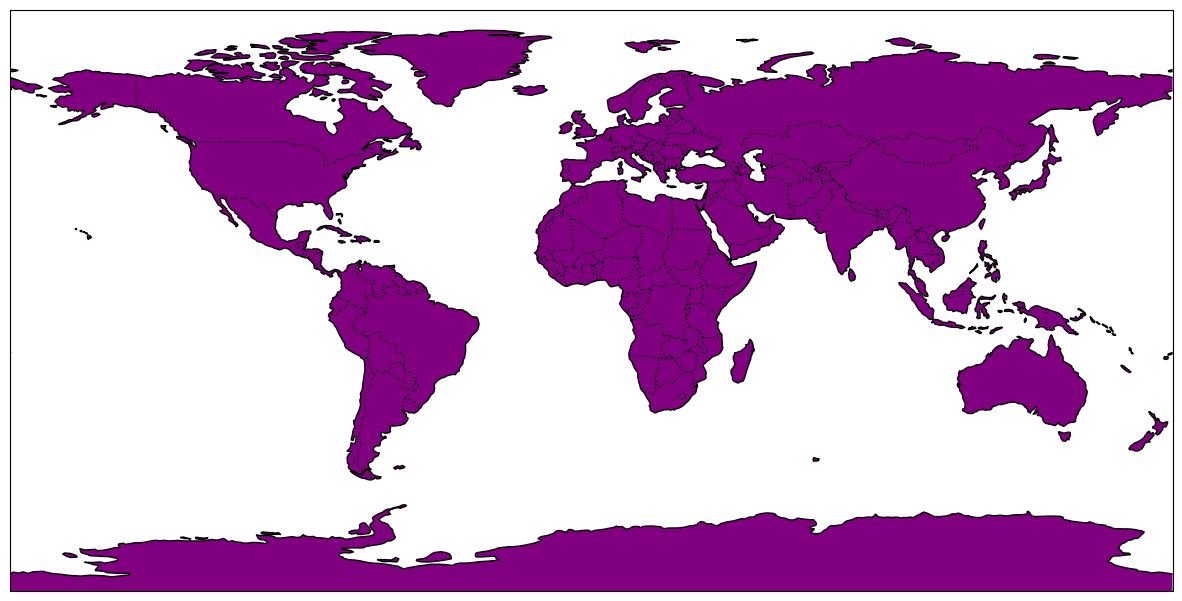

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the map with Cartopy
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='purple')
ax.add_feature(cfeature.OCEAN, facecolor='white')


plt.show()


In [1]:
import requests

# Add your API key here
AVIATIONSTACK_API_KEY = "542416bf5e45826b1c4b1884d4076cb0"

def fetch_nearest_airport(latitude, longitude):
    """
    Fetch the nearest airport using AviationStack API.
    """
    try:
        url = f"http://api.aviationstack.com/v1/airports"
        params = {
            'access_key': AVIATIONSTACK_API_KEY,
            'lat': latitude,
            'lng': longitude,
        }
        
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an HTTPError if the response was not successful
        
        data = response.json()
        if "data" in data and len(data["data"]) > 0:
            # Select the nearest airport
            nearest_airport = data["data"][0]  # Assuming the API returns a sorted list of airports
            return nearest_airport.get("airport_name", "JFK")
        
        # Default fallback if no airports are found
        return "JFK"
    
    except Exception as e:
        print(f"Error fetching nearest airport: {e}")
        return "JFK"  # Fallback to default JFK if API fails


In [ ]:
def get_default_origin():
    """
    Determine the default origin based on the user's location.
    """
    try:
        # Use an external service to get the user's approximate location
        response = requests.get("http://ip-api.com/json")
        response.raise_for_status()
        data = response.json()

        if data["status"] == "success":
            latitude = data["lat"]
            longitude = data["lon"]
            print(f"Lat :{latitude} \n Long: {longitude}")
            # Use the AviationStack API to get the nearest airport
            return fetch_nearest_airport(latitude, longitude)
        
        # Default to JFK if location cannot be determined
        return "JFK"

    except Exception as e:
        print(f"Error fetching location: {e}")
        return "JFK"  # Fallback to default JFK


In [3]:
origin=get_default_origin()

In [4]:
print(origin)

Anaa
